# Title- Titanic: Machine Learning from Disaster

### Competition Description

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

#### Practice Skills
###### Binary classification 
---

### Overview
The data has been split into two groups:

training set (train.csv)
test set (test.csv)

The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

We also include gender_submission.csv, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.

----

### Data Dictionary

<table>
<tbody>
<tr><th><b>Variable</b></th><th><b>Definition</b></th><th><b>Key</b></th></tr>
<tr>
<td>survival</td>
<td>Survival</td>
<td>0 = No, 1 = Yes</td>
</tr>
<tr>
<td>pclass</td>
<td>Ticket class</td>
<td>1 = 1st, 2 = 2nd, 3 = 3rd</td>
</tr>
<tr>
<td>sex</td>
<td>Sex</td>
<td></td>
</tr>
<tr>
<td>Age</td>
<td>Age in years</td>
<td></td>
</tr>
<tr>
<td>sibsp</td>
<td># of siblings / spouses aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>parch</td>
<td># of parents / children aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>ticket</td>
<td>Ticket number</td>
<td></td>
</tr>
<tr>
<td>fare</td>
<td>Passenger fare</td>
<td></td>
</tr>
<tr>
<td>cabin</td>
<td>Cabin number</td>
<td></td>
</tr>
<tr>
<td>embarked</td>
<td>Port of Embarkation</td>
<td>C = Cherbourg, Q = Queenstown, S = Southampton</td>
</tr>
</tbody>
</table>

 


---
### Variable Notes
<p><b>pclass</b>: A proxy for socio-economic status (SES)<br> 1st = Upper<br> 2nd = Middle<br> 3rd = Lower<br><br> <b>age</b>: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5<br><br> <b>sibsp</b>: The dataset defines family relations in this way...<br> Sibling = brother, sister, stepbrother, stepsister<br> Spouse = husband, wife (mistresses and fiancés were ignored)<br><br> <b>parch</b>: The dataset defines family relations in this way...<br> Parent = mother, father<br> Child = daughter, son, stepdaughter, stepson<br> Some children travelled only with a nanny, therefore parch=0 for them.</p>

---
### 1.Prepare Problem
#### a.Load libraries
#### b.Load dataset
##### for this problem we will be loading training set and test  from two files as given by kaggle 

In [1]:
import os
import math
import datetime

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer

from mlsettings.settings import load_app_config, get_datafolder_path
from mltools.mlcommon import load_data, print_dataset_info, split_dataset, auto_scatter_simple

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
 
% matplotlib inline 
from numpy import set_printoptions
set_printoptions(precision=4)

In [2]:
load_app_config()
DIRECTORY="kaggle_titanic"
TRAIN_FILE ='train.csv'
TEST_FILE = 'test.csv'
RESPONSE = 'Survived'
input_path = get_datafolder_path()

{'REG': {'ML_DATASOURCE': 'F:\\DataSource', 'ML_PATH': 'F:\\MachineLearning'}, 'UAT': {'ML_DATASOURCE': 'F:\\DataSource', 'ML_PATH': 'F:\\MachineLearning'}, 'PRD': {'ML_DATASOURCE': 'F:\\DataSource', 'ML_PATH': 'F:\\MachineLearning'}, 'DEV': {'ML_DATASOURCE': 'F:\\DataSource', 'ML_PATH': 'F:\\MachineLearning'}}
Adding F:\DataSource  to system path
Adding F:\MachineLearning  to system path


In [3]:
def load_dataset(filename=TRAIN_FILE,response=RESPONSE):
    input_file = os.path.join(input_path, DIRECTORY, filename)
    input_dataset = load_data(input_file)
    print(" input file is :{0} loaded.".format(input_file))
    #print(input_dataset.head())
    
    try:
        continuous_vars = input_dataset.describe().columns.values.tolist()
        print("Continous Variables")
        print(continuous_vars)
    except ValueError:
        print("No continous variables")
    
    try:
        categorical_vars = input_dataset.describe(include=["object"]).columns.values.tolist()
        print("Categorical Variables")
        print(categorical_vars)
    except ValueError:
        print("No categorical variables")
        categorical_vars = None
    
    response_column =  [col for col in input_dataset.columns if response in col]
    feature_columns =  [col for col in input_dataset.columns if response not in col]
      
    return  input_dataset,feature_columns,response_column,continuous_vars,categorical_vars


In [4]:
train_dataset,feature_columns,response_column,continuous_vars,categorical_vars = load_dataset(filename=TRAIN_FILE,response=RESPONSE)
train_X = train_dataset[feature_columns]
train_y = train_dataset[response_column]


 input file is :F:\DataSource\kaggle_titanic\train.csv loaded.
Continous Variables
['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
Categorical Variables
['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [5]:
test_dataset,tfeature_columns,tresponse_column,tcontinuous_vars,tcategorical_vars  = load_dataset(filename=TEST_FILE,response=RESPONSE)
test_X =[]
test_y=[]
if feature_columns:
    test_X = test_dataset[feature_columns]

if response_column:
    test_y = test_dataset[feature_columns]
   

 input file is :F:\DataSource\kaggle_titanic\test.csv loaded.
Continous Variables
['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
Categorical Variables
['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


### 2.Summarize Data 
#### a) Descriptive statistics
#### b) Data visualizations


In [6]:
def display_data_descriptives(input_dataset,X,feature_columns,y,response_column):
    print("<{0} {1} {0}>".format("="*40,"info"))
    print(input_dataset.info())
    print("<{0} {1} {0}>".format("="*40,"feature columns"))
    print(feature_columns)
    print("<{0} {1} {0}>".format("="*40,"data header"))
    print(X.head().to_string())
    print("<{0} {1} {0}>".format("="*40,"response"))
    print(response_column)
    print("<{0} {1} {0}>".format("="*40,"Descriptive Statistics -X"))
    print(X.describe())
    print("<{0} {1} {0}>".format("="*40,"Descriptive Statistics -y"))
    print(y.describe())
    print("<{0} {1} {0}>".format("="*40,"value_count -y"))
 
    print(y.groupby(response_column)[response_column].count())
    ##print("<{0} {1} {0}>".format("="*40,"Correlation"))
    ##print(input_dataset.corr(method='pearson'))

In [7]:
pd.set_option('display.width', 120)
pd.set_option('precision', 4)
display_data_descriptives(train_dataset,train_X,feature_columns,train_y,response_column)
#display_data_descriptives(test_dataset,tfeature_columns,tresponse_column,tcontinuous_vars,tcategorical_vars)
print(test_dataset.info())

<======================================== info ========================================>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None
<======================================== feature columns ========================================>
['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
<======================================== data header ========================================>
   PassengerId  Pcla

In [8]:
categorical = ['Sex', 'Embarked','SibSp','Parch','Pclass']
def bar_plots(train_dataset,categorical):
    fig = plt.figure(figsize=(16,12))
    size =len(categorical)
     
    for i in range(size):
        #counts=train_dataset.groupby(categorical[i])['Survived'].value_counts()
        #print("Dataset group by {0} ".format(categorical[i]))
        #print(counts)
        ax = fig.add_subplot(3, 2, i+1)
        sns.barplot(x=categorical[i], y="Survived", data=train_dataset,ax=ax)
    plt.tight_layout()

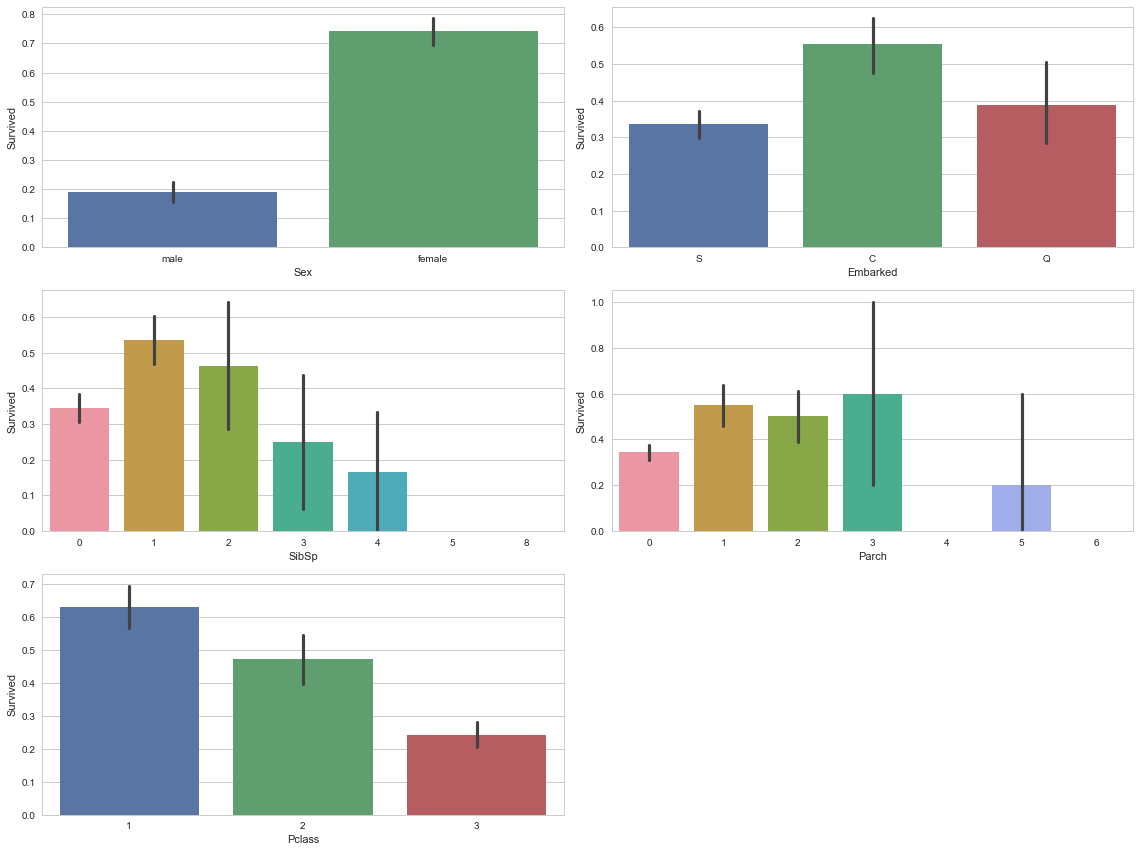

In [9]:
sns.set(style="whitegrid", color_codes=True)

flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

bar_plots(train_dataset,categorical)

### Inferences  from bar plots  
##### Survival rate of female is more than males in all passenger categories
##### Survival rate for passenger class 3 is least
##### Survival rate of  passengers boarded at Embarked  at  C is greater than others
##### Passengers havings siblings survived better  than  zero siblings
##### Passengers travelling alone had less chances of survival than families 



In [10]:
#g  = sns.factorplot(x="Pclass", hue="Sex", col="Survived",data=train_dataset, kind="count",size=5, aspect=.7,palette=flatui);
#g1 = sns.factorplot(x="Embarked", hue="Sex", col="Survived",data=train_dataset, kind="count",size=5, aspect=.7,palette=flatui);   
#g2 = sns.factorplot(x="SibSp", col="Survived",data=train_dataset, kind="count",size=5, aspect=.7,palette=sns.color_palette("husl",2)); 
#g3 = sns.factorplot(x="Parch", col="Survived",data=train_dataset, kind="count",size=5, aspect=.7,palette=sns.color_palette("husl",2)); 

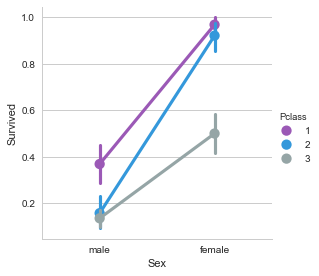

In [11]:
g = sns.factorplot(x='Sex',y='Survived',hue='Pclass',size=4, aspect=1,palette=flatui ,data =train_dataset)

##### Women  from 1st  and 2nd class have 100 % survival
##### Men from 2nd and 3rd Pclass have only around 10% survival chance.

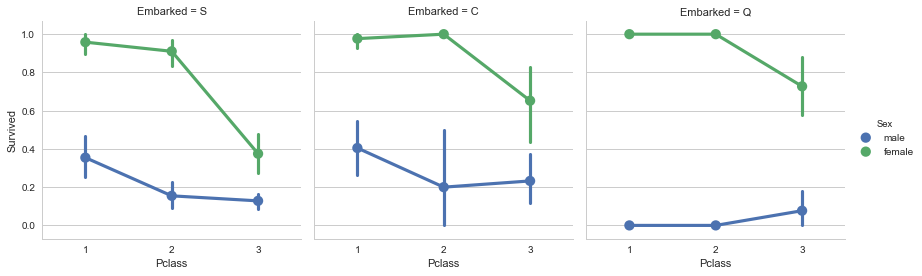

In [12]:
g1 =sns.factorplot(x='Pclass', y='Survived', hue='Sex', col='Embarked', data=train_dataset)

##### Males from Pclass 1 only have slightly higher survival chance than Pclass 2 and 3

In [13]:
#ax  =sns.violinplot(x="Embarked", y="Age", hue="Survived", data=train_dataset, split=True)


---  
### 3. Prepare Data
#### a) Data Cleaning
#### b) Feature Selection
#### c) Data Transforms

#### Transform names into  Titles

In [14]:
full_dataset = [train_dataset, test_dataset]
for dataset in full_dataset:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.',expand=False)

In [15]:
train_dataset.groupby('Title')['Survived'].value_counts()

Title     Survived
Capt      0             1
Col       0             1
          1             1
Countess  1             1
Don       0             1
Dr        0             4
          1             3
Jonkheer  0             1
Lady      1             1
Major     0             1
          1             1
Master    1            23
          0            17
Miss      1           127
          0            55
Mlle      1             2
Mme       1             1
Mr        0           436
          1            81
Mrs       1            99
          0            26
Ms        1             1
Rev       0             6
Sir       1             1
Name: Survived, dtype: int64

In [16]:
test_dataset.groupby('Title')['Name'].count()

Title
Col         2
Dona        1
Dr          1
Master     21
Miss       78
Mr        240
Mrs        72
Ms          1
Rev         2
Name: Name, dtype: int64

In [17]:
for dataset in full_dataset:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_dataset[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.5750
1,Miss,0.7027
2,Mr,0.1567
3,Mrs,0.7937
4,Other,0.3478


In [18]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Other": 5}
for dataset in full_dataset:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

####  Transform  sex  label in numerical categorical value

In [19]:
class_lb = LabelBinarizer()
 
train_sex_bin = class_lb.fit_transform(train_dataset['Sex'].values) 
train_dataset['Sex']=train_sex_bin
test_sex_bin =class_lb.transform(test_dataset['Sex'].values)
test_dataset['Sex']=test_sex_bin

#####  Fill in missing Embarked values 


In [20]:
print("Embarked total count is {0}\nTotal trainset is {1} " .format(train_dataset['Embarked'].describe()['count'],len(train_dataset)) )
print("fill missing values with max Embarked counts")

Embarked total count is 889
Total trainset is 891 
fill missing values with max Embarked counts


In [21]:
for dataset in full_dataset:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

#### Fill in missing age with  median age based on   title 

In [22]:
#train_dataset["Age"].fillna(train_dataset.groupby("Title")["Age"].transform("median"), inplace=True)

In [23]:
#test_dataset["Age"].fillna(test_dataset.groupby("Title")["Age"].transform("median"), inplace=True)

In [24]:
#train_dataset['AgeBand'] = pd.cut(train_dataset['Age'], 5)

In [25]:
for dataset in full_dataset:
    age_avg = dataset['Age'].mean()
    age_std = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()
    
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)

for dataset in full_dataset:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4

F:\Anaconda2\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [26]:
train_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,1,1,0,A/5 21171,7.2500,NaN,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,PC 17599,71.2833,C85,1,3
2,3,1,3,"Heikkinen, Miss. Laina",0,1,0,0,STON/O2. 3101282,7.9250,NaN,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,2,1,0,113803,53.1000,C123,0,3
4,5,0,3,"Allen, Mr. William Henry",1,2,0,0,373450,8.0500,NaN,0,1


In [27]:
#print (train_dataset[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean())

####  Transform Fare 

In [28]:
for dataset in full_dataset:
    dataset['Fare'] = dataset['Fare'].fillna(train_dataset['Fare'].median())
    
train_dataset['FareBand'] = pd.qcut(train_dataset['Fare'], 4)
print (train_dataset[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean())

for dataset in full_dataset:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

          FareBand  Survived
0   (-0.001, 7.91]    0.1973
1   (7.91, 14.454]    0.3036
2   (14.454, 31.0]    0.4550
3  (31.0, 512.329]    0.5811


In [29]:
train_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FareBand
0,1,0,3,"Braund, Mr. Owen Harris",1,1,1,0,A/5 21171,0,NaN,0,1,"(-0.001, 7.91]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,PC 17599,3,C85,1,3,"(31.0, 512.329]"
2,3,1,3,"Heikkinen, Miss. Laina",0,1,0,0,STON/O2. 3101282,1,NaN,0,2,"(7.91, 14.454]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,2,1,0,113803,3,C123,0,3,"(31.0, 512.329]"
4,5,0,3,"Allen, Mr. William Henry",1,2,0,0,373450,1,NaN,0,1,"(7.91, 14.454]"


In [30]:
for dataset in full_dataset:
    dataset['FamilySize'] = dataset['SibSp'] +  dataset['Parch'] + 1
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
    
print (train_dataset[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean())


   IsAlone  Survived
0        0    0.5056
1        1    0.3035


#### Feature Selection

In [31]:
features_drop = ['Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'FamilySize']
train_dataset = train_dataset.drop(features_drop, axis=1)
test_dataset = test_dataset.drop(features_drop, axis=1)
train_dataset = train_dataset.drop(['PassengerId', 'FareBand'], axis=1)

In [32]:
train_dataset.head()
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int32
Age         891 non-null int32
Fare        891 non-null int32
Embarked    891 non-null int32
Title       891 non-null int64
IsAlone     891 non-null int64
dtypes: int32(4), int64(4)
memory usage: 41.8 KB


In [33]:
test_dataset.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,892,3,1,2,0,2,1,1
1,893,3,0,2,0,0,3,0
2,894,2,1,3,1,2,1,1
3,895,3,1,1,1,0,1,1
4,896,3,0,1,1,0,3,0


### 4. Evaluate Algorithms
####  a) Split-out validation dataset
####  b) Test options and evaluation metric
####  c) Spot Check Algorithms
####  d) Compare Algorithms

In [34]:
X_train = train_dataset.drop('Survived', axis=1)
y_train = train_dataset['Survived']
X_test = test_dataset.drop("PassengerId", axis=1).copy()

X_train.shape, y_train.shape, X_test.shape


((891, 7), (891,), (418, 7))

In [35]:
from sklearn.model_selection  import  train_test_split
from sklearn.linear_model  import LogisticRegression
test_size = 0.33
seed = 7

X_trainmodel, X_val, y_trainmodel, y_val = train_test_split(X_train, y_train, test_size=test_size,random_state=seed)

In [36]:
 type(X_train)

pandas.core.frame.DataFrame

In [37]:
logrmodel = LogisticRegression()
logrmodel.fit(X_trainmodel, y_trainmodel.values.ravel())
result = logrmodel.score(X_trainmodel, y_trainmodel.values)
print ("Accuracy: {0:.3f}".format(result*100.0))

Accuracy: 82.047


In [38]:
logrmodel_l1 = LogisticRegression(penalty='l1', C=1.0)
logrmodel_l1 .fit(X_trainmodel, y_trainmodel.values.ravel())
result = logrmodel_l1 .score(X_trainmodel, y_trainmodel.values)
print ("Accuracy: {0:.3f}".format(result*100.0))

Accuracy: 82.550


In [39]:
from sklearn.svm import LinearSVC
lin_svc = LinearSVC()
lin_svc.fit(X_trainmodel, y_trainmodel.values.ravel())
#y_pred_linear_svc = lin_svc.predict(X_test)
acc_linear_svc = round(lin_svc.score(X_trainmodel, y_trainmodel) * 100, 2)
print (acc_linear_svc)

80.54


In [40]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
def train_and_evaluate(model, X_train, y_train, t_splits =10,seed=7):
    model.fit(X_train, y_train)
    print ("Coefficient of determination on training set:",model.score(X_train, y_train))
    # create a k-fold cross validation iterator of k=5 folds
    cv = KFold(n_splits= t_splits,shuffle=True, random_state=seed)
    scores = cross_val_score(model, X_train, y_train, cv=cv)
    print(scores)
    print ("Average coefficient of determination using {0}-fold crossvalidation:{1}".format(t_splits,np.mean(scores)))

In [41]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda_model = LinearDiscriminantAnalysis()
train_and_evaluate(lda_model,X_trainmodel, y_trainmodel.values.ravel(),10,7)

Coefficient of determination on training set: 0.805369127517
[ 0.8167  0.7833  0.8667  0.75    0.75    0.8167  0.8475  0.8136  0.8475
  0.7119]
Average coefficient of determination using 10-fold crossvalidation:0.800367231638418


In [56]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline

Accuracy of LR is 0.8087288135593221 with variance 0.06178573151713022
Accuracy of LDA is 0.8037005649717515 with variance 0.055456869961540825
Accuracy of DT is 0.8070056497175141 with variance 0.06694602962989853
Accuracy of KNN is 0.7986158192090395 with variance 0.036246240343435925
Accuracy of GB is 0.7987570621468927 with variance 0.053591851667611455
Accuracy of SVM is 0.8237005649717514 with variance 0.04769520336085228
Accuracy of LIN-SVC is 0.8053389830508475 with variance 0.05611444515759636
Accuracy of RFC is 0.7969774011299434 with variance 0.05544832208898628
Accuracy of ETC is 0.805310734463277 with variance 0.06068725007619363
Accuracy of ABC is 0.8221468926553672 with variance 0.05074238987818734
Accuracy of GBM is 0.8322033898305085 with variance 0.05640387776832172


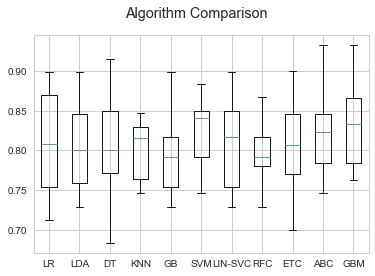

In [69]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('DT',DecisionTreeClassifier()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('GB',GaussianNB()))
models.append(('SVC',SVC(C=2.5)))
models.append(('LIN-SVC',LinearSVC()))
models.append(('RFC',RandomForestClassifier()))
models.append(('ETC',ExtraTreesClassifier()))
models.append(('ABC',AdaBoostClassifier()))
models.append(('GBM', GradientBoostingClassifier()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7)
    cv_results = cross_val_score(model, X_trainmodel, y_trainmodel.values.ravel(), cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "Accuracy of {0} is {1} with variance {2}".format(name, cv_results.mean(), cv_results.std())
    print(msg)
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [47]:
from sklearn import metrics
def measure_performance(X, y, clf, show_accuracy=True,show_classification_report=True,
                        show_confusion_matrix=True, show_r2_score=False):
    y_pred = clf.predict(X) 
    if show_accuracy:
        print ("Accuracy:{0:.3f}".format( metrics.accuracy_score(y, y_pred)),"\n" )
    if show_classification_report:
        print ("Classification report")
        print (metrics.classification_report(y, y_pred),"\n")
    if show_confusion_matrix:
        print("Confusion matrix") 
        print(metrics.confusion_matrix(y, y_pred),"\n")
    if show_r2_score:
        print ("Coefficient of determination:{0:.3f}"
               .format( metrics.r2_score(y, y_pred)),"\n")
    return y_pred

Classification report
             precision    recall  f1-score   support

          0       0.79      0.86      0.82       176
          1       0.76      0.66      0.71       119

avg / total       0.78      0.78      0.78       295
 

Confusion matrix
[[152  24]
 [ 41  78]] 



In [49]:
rfc =RandomForestClassifier(n_estimators=500)
rfc.fit(X_trainmodel, y_trainmodel.values.ravel())
y_pred_val=measure_performance(X_val,y_val,rfc, show_accuracy=False, 
                    show_classification_report=True,
                    show_confusion_matrix=True, show_r2_score=False)

Classification report
             precision    recall  f1-score   support

          0       0.79      0.90      0.84       176
          1       0.81      0.66      0.73       119

avg / total       0.80      0.80      0.80       295
 

Confusion matrix
[[158  18]
 [ 41  78]] 



In [50]:
y_pred_random_forest=rfc.predict(X_test)

In [51]:
etc =ExtraTreesClassifier()
etc.fit(X_trainmodel, y_trainmodel.values.ravel())
y_pred=measure_performance(X_val,y_val,etc, show_accuracy=False, 
                    show_classification_report=True,
                    show_confusion_matrix=True, show_r2_score=False)

Classification report
             precision    recall  f1-score   support

          0       0.77      0.91      0.84       176
          1       0.83      0.61      0.70       119

avg / total       0.80      0.79      0.78       295
 

Confusion matrix
[[161  15]
 [ 47  72]] 



In [57]:
def evaluvate_pipeline(X_train,y_train,estimators):
    
    # create pipeline
    
    model = Pipeline(estimators)
    # evaluate pipeline
    kfold = KFold(n_splits=10, random_state=7)
    scores = cross_val_score(model, X_train, y_train.values.ravel(), cv=kfold)
    
    return scores,model

In [60]:
estimators =[]
estimators.append(('standardize', StandardScaler()))
estimators.append(('lda', LinearDiscriminantAnalysis()))
scores,pipeline = evaluvate_pipeline(X_trainmodel, y_trainmodel,estimators)
print(scores.mean())
pipeline.fit(X_trainmodel,y_trainmodel.ravel())
y_pred = measure_performance(X_val,y_val,pipeline, show_accuracy=True, 
                    show_classification_report=True,
                    show_confusion_matrix=True, show_r2_score=False)

0.803700564972
Accuracy:0.753 

Classification report
             precision    recall  f1-score   support

          0       0.78      0.82      0.80       176
          1       0.71      0.65      0.68       119

avg / total       0.75      0.75      0.75       295
 

Confusion matrix
[[145  31]
 [ 42  77]] 



In [73]:

estimators =[]
estimators.append(('standardize', StandardScaler()))
estimators.append(('svc',SVC()))
scores,pipeline = evaluvate_pipeline(X_trainmodel, y_trainmodel,estimators)
print(scores.mean())
pipeline.fit(X_trainmodel, y_trainmodel.values.ravel())
y_pred=measure_performance(X_val,y_val,svc, show_accuracy=False, 
                    show_classification_report=True,
                    show_confusion_matrix=True, show_r2_score=False)

0.825423728814
Classification report
             precision    recall  f1-score   support

          0       0.79      0.86      0.82       176
          1       0.76      0.66      0.71       119

avg / total       0.78      0.78      0.78       295
 

Confusion matrix
[[152  24]
 [ 41  78]] 



In [95]:
gbm=GradientBoostingClassifier()
print(gbm)
gbm.fit(X_trainmodel, y_trainmodel.values.ravel())
y_pred=measure_performance(X_val,y_val,gbm, show_accuracy=False, 
                    show_classification_report=True,
                    show_confusion_matrix=True, show_r2_score=False)
y_pred_result=gbm.predict(X_test)



GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)
Classification report
             precision    recall  f1-score   support

          0       0.81      0.88      0.84       176
          1       0.80      0.70      0.74       119

avg / total       0.81      0.81      0.80       295
 

Confusion matrix
[[155  21]
 [ 36  83]] 



In [ ]:
from sklearn.model_selection import GridSearchCV

In [66]:
submission = pd.DataFrame({
        "PassengerId": test_X["PassengerId"],
        "Survived": y_pred_result
    })
submission.to_csv('submission.csv', index=False)